## Week 4 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


### Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.

 * 데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
 * describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다. 아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
 * 전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니 데이터가 수치 형태로 되어 있는지도 확인해 주세요!
 * 해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!

In [4]:
# "시점"의 연도를 integer로 바꿔 "연도" 열 생성
df["연도"] = df["시점"].map(lambda x:int(x.split(".")[0]))

# "시점"의 분기를 integer로 바꿔 "분기" 열 생성
df["분기"] = df["시점"].map(lambda x:int(x.split(".")[1].split("/")[0]))

# "데이터" 열을 "백만" 열로 변경 
df = df.rename(columns={"데이터":"백만"})

# df의 기술통계 구하기
df.describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


#### 위의 기술통계로 알 수 있는 점
 * 2017년도 부터 2022년도 까지의 데이터를 모아둔 것이다.
 * 평균값과 중앙값이 차이가 큰 것으로 보아 이상값이 있을 것이다.

### Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.
 * 국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
 * pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
 * 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

In [7]:
# 행에는 "국가(대륙)별", 열에는 "연도"를 두고 판매액의 합계를 구함
pd.pivot_table(df, index="국가(대륙)별", columns="연도", values="백만", aggfunc="sum")

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


### Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.
 * 2020년에 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요!
 * 또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!
 * 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

In [9]:
# 2020년의 데이터 중 국가(대륙)별, 상품군별 판매액의 합계 구하기
df_2020 = df[df["연도"]==2020].copy()
df_2020_group = df_2020.groupby(["국가(대륙)별", "상품군별"])["백만"].sum()

# unstack()을 사용해 행의 "상품군별"을 열로 옮김
df_2020_group.unstack()

상품군별,가전·전자·통신기기,기 타,농축수산물,사무·문구,생활용품 및 자동차용품,서 적,소프트웨어,스포츠·레저용품,아동·유아용품,음·식료품,음반·비디오·악기,의류 및 패션 관련상품,컴퓨터 및 주변기기,화장품
국가(대륙)별,,,,,,,,,,,,,,
기타,1716,3345,9,187,1464,4563,21,755,1646,1596,1410,6501,5653,15572
대양주,3825,923,1,21,1198,367,20,690,484,403,1800,3746,318,2459
미국,10103,38731,33,398,11467,9709,865,5862,4934,2706,32919,82154,6057,49446
아세안(ASEAN),12405,2620,17,3279,6432,4192,3,7423,2698,4291,16135,37992,541,7332
유럽연합(EU),3040,3907,0,25,2560,514,99,1297,1354,423,12092,5120,1910,7524
일본,404,30509,2,1526,3911,1055,27,646,1353,4699,14738,119452,193,42215
중국,1353,22736,88,403,7142,6659,4,3999,5606,4220,125078,73068,235,38855
중남미,912,625,0,3,1361,188,15,183,151,774,6421,614,362,954
중동,839,533,0,4,1060,139,17,196,121,927,3250,1776,388,2217


<Axes: xlabel='국가(대륙)별', ylabel='백만'>

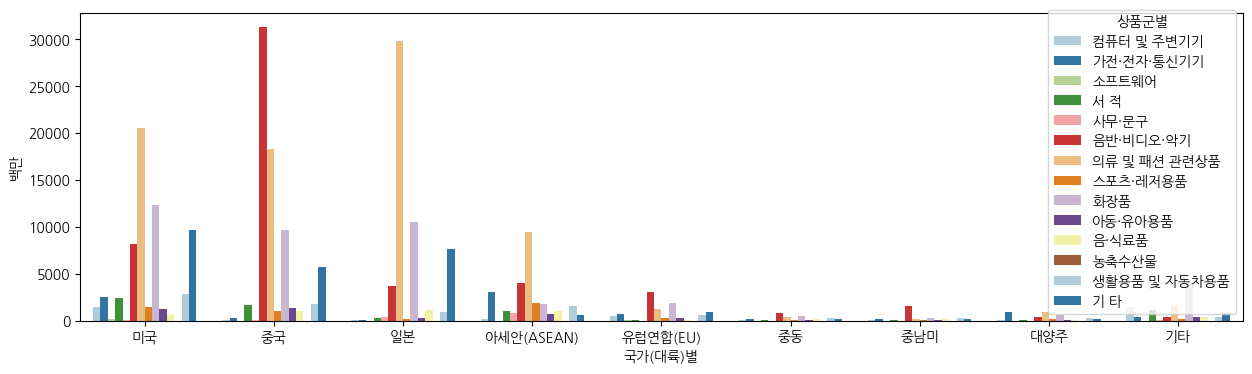

In [10]:
# 2020년의 국가(대륙)별 판매액을 막대그래프로 표현
plt.figure(figsize=(15,4))
sns.barplot(data=df_2020, x="국가(대륙)별", y="백만", hue="상품군별", palette="Paired", errorbar=None)

#### 위 그래프로 알 수 있는 것
 * 2020년도의 해외 온라인 판매량은 중국, 일본, 미국 순으로 높다.
 * 중국에서는 음반·비디오·악기 상품군의 판매액이 제일 높다.
 * 미국과 일본에서는 의류 및 패션 관련상품의 판매액이 제일 높다.

### Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.

 * 온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다.
 * 2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요!
 * 시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다.

In [13]:
# 2021년 이하의 데이터 중 "국가(대륙)별"이 미국, 중국, 일본이고, 
# "상품군별"이 의류 및 패션 관련상품, 화장품, 음반·비디오·악기인 데이터만 df_filtered에 저장
df_filtered = df[
    (df["연도"]<=2021)&
    (df["국가(대륙)별"].isin(["미국", "중국", "일본"]))&
    (df["상품군별"].isin(["의류 및 패션 관련상품", "화장품", "음반·비디오·악기"]))
    ].copy()

# 위의 데이터를 pivot_table을 사용해 재구조화
df_filtered.pivot_table(index=["국가(대륙)별", "상품군별"], columns="연도", values="백만", aggfunc="sum")

연도                     2017    2018    2019    2020    2021
국가(대륙)별 상품군별                                               
미국      음반·비디오·악기      8628   13858   19596   32919   41841
        의류 및 패션 관련상품  49891   47353   55125   82154  100662
        화장품           31237   38537   41786   49446   38665
일본      음반·비디오·악기      2824    7018    8712   14738   15940
        의류 및 패션 관련상품  89085  134742  131538  119452  118959
        화장품            6333    5276   10906   42215   77124
중국      음반·비디오·악기      8437   15046   36193  125078   62874
        의류 및 패션 관련상품  84248   87611   77844   73068   64078
        화장품           34608   43873   59445   38855   30472

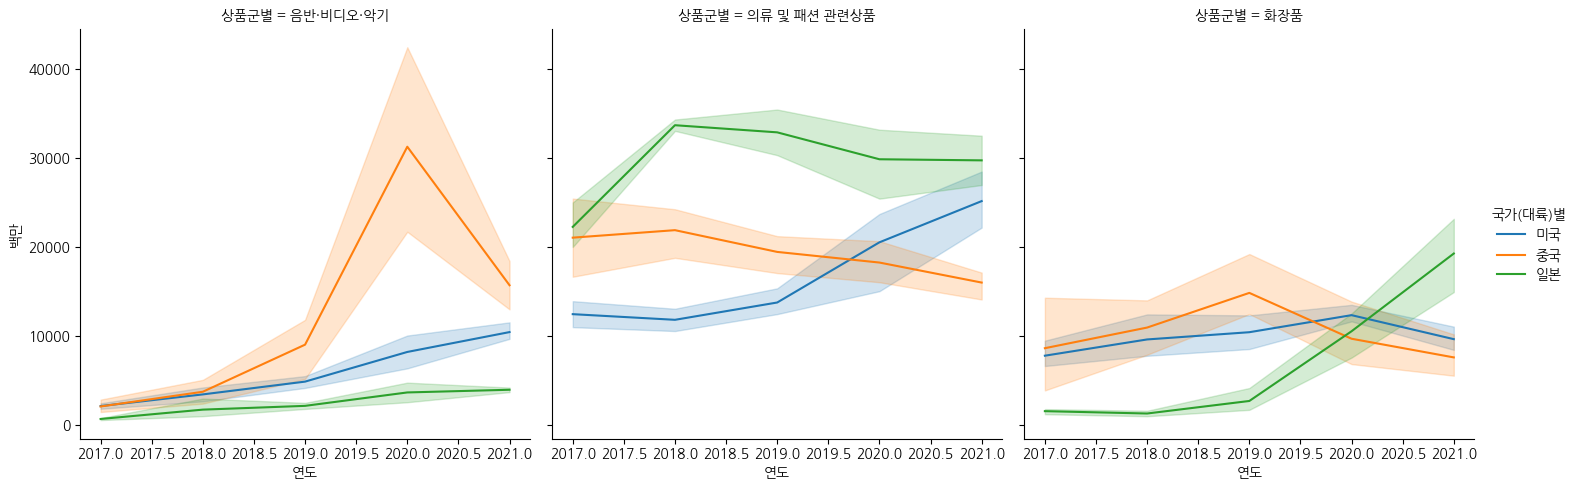

In [14]:
# relplot을 사용해 각 상품군별 그래프를 그려 미국, 중국, 일본의 2017~2021년 판매액을 시각화
sns.relplot(data=df_filtered, x="연도", y="백만", hue="국가(대륙)별", col="상품군별", kind="line")

### Q5. KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요!
 * KOSIS(https://kosis.kr/) 사이트에서 관심있는 분야의 데이터를 찾고 원하는 시각화를 해주세요!
 * 조회조건에 계, 합계 등을 미리 제거하고 다운로드 받으면 전처리를 줄일 수 있습니다.
 * 행렬전환 기능을 사용하면 따로 melt를 진행하지 않아도 되기 때문에 이 또한 전처리를 줄일 수 있습니다.

In [75]:
# 해당 csv파일을 읽어옴
df_gas = pd.read_csv("data/국가_온실가스_종류별_분야별_배출량_추이_20240821051201.csv", encoding="cp949")

# d.melt 함수를 사용하여 2019, 2020, 2021 열을 '연도' 열로, 해당 값들을 '배출량' 열로 변환
df_long = pd.melt(df_gas, id_vars=['구분(1)', '구분(2)', '구분(3)', '구분(4)'], 
                  value_vars=['2019', '2020', '2021'], 
                  var_name='연도', value_name='배출량')

# 'NO' 데이터를 NaN으로 처리
df_long['배출량'] = df_long['배출량'].replace('NO', np.nan)
# 배출량 데이터을 숫자형으로 변환
df_long['배출량'] = df_long['배출량'].astype(float) 

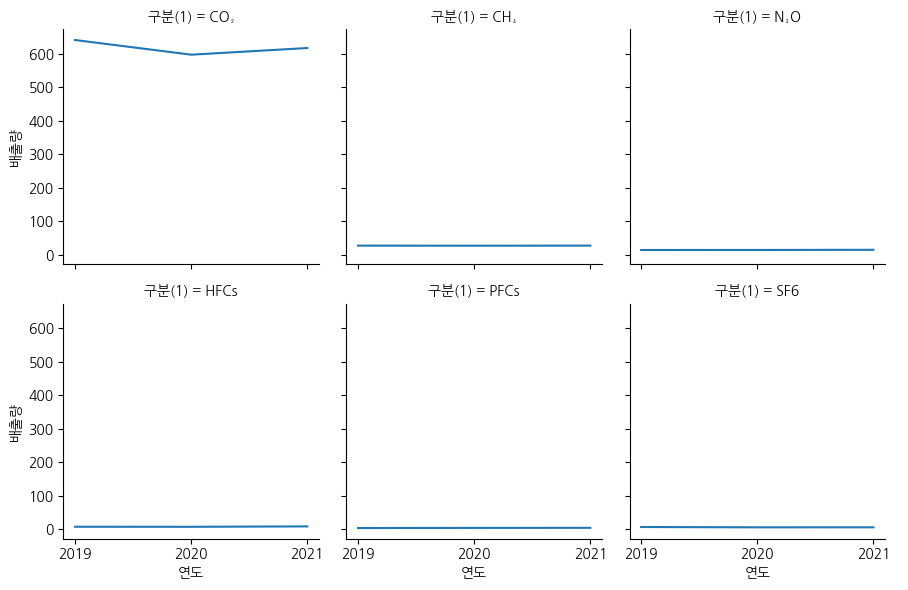

In [77]:
# 온실가스의 종류별로 시간에 따른 배출량을 그래프로 그림

# '구분(2)'가 '총배출량'인 데이터만 선택
df_total = df_long[df_long['구분(2)'] == '총배출량']

# '구분(1)' 별로 그래프를 나누고 col_wrap 옵션으로 한 줄에 표시할 그래프 수를 지정
g = sns.FacetGrid(df_total, col='구분(1)', col_wrap=3)

# 연도에 따른 배출량을 선그래프로 그림
g.map(sns.lineplot, '연도', '배출량')
g.add_legend() # 범례 추가
plt.show() # 그래프 출력

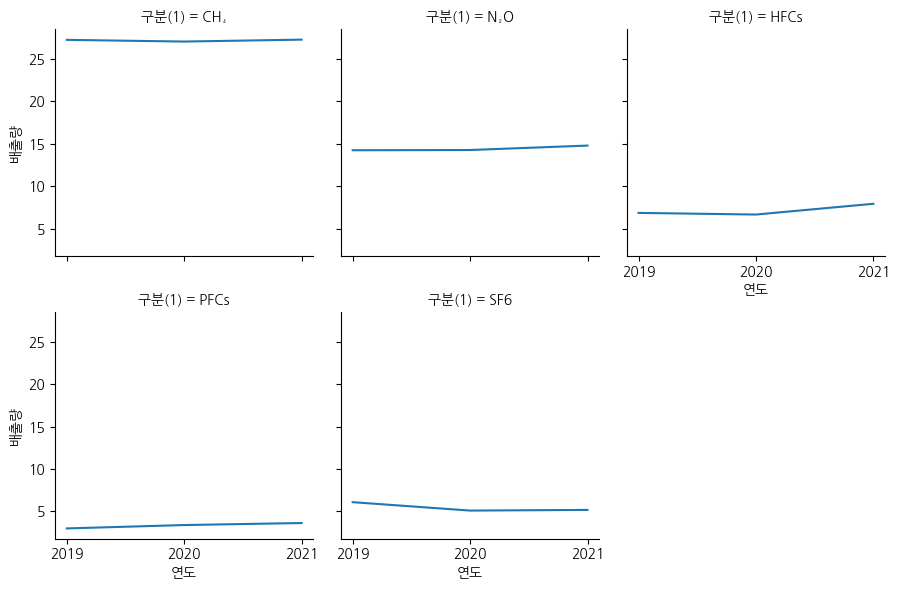

In [79]:
# CO2 데이터 제외한 그래프 그리기
df_not_co2 = df_total[df_total['구분(1)'] != 'CO₂']

g = sns.FacetGrid(df_not_co2, col='구분(1)', col_wrap=3)
g.map(sns.lineplot, '연도', '배출량')
g.add_legend() # 범례 추가
plt.show() # 그래프 출력

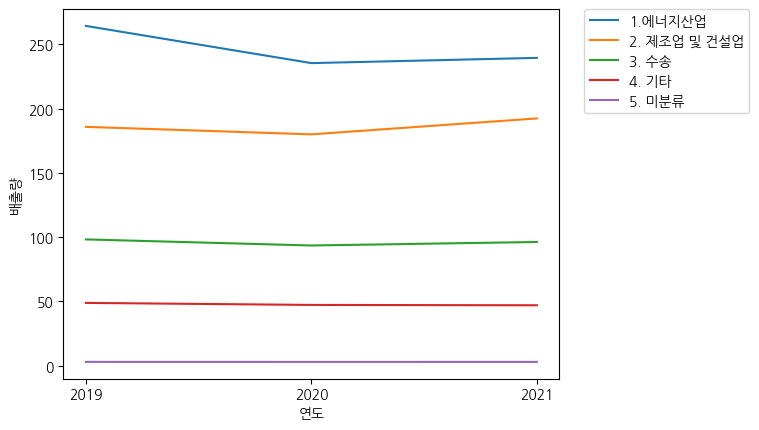

In [73]:
# 구분(4)의 '소계' 제외
df_filtered = df_long[df_long['구분(4)'] != '소계']

# 그래프 그리기
sns.lineplot(data=df_filtered, x='연도', y='배출량', hue='구분(4)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # 범례 위치 조정
plt.show()

#### 위의 데이터 분석으로 알아낸 것들
 * 온실가스 종류로 구분했을 때 CO2, CH2, N2O 순으로 배출량이 많았다.
 * 산업으로 구분했을 때 에너지 산업, 제조업 및 건설업, 수송 순으로 배출량이 많았다.
 * 긴 기간동안 배출량의 변화를 살펴보고 싶었으나 2019~2021년도의 데이터만 있어서 아쉬웠다.